# First semester Project 

# Exploring LendingClub Data and Building a Loan Repayment Prediction Model

**Note: Please open this notebook in Python 3.**

In this project, we will delve into publicly available data from LendingClub.com, a platform that connects borrowers in need of funds with potential investors. As an investor, it is crucial to identify individuals with a high likelihood of repaying the loan. Our goal is to create a predictive model that aids in this decision-making process.

The dataset we will be working with spans the years 2007 to 2010, capturing a snapshot of lending activities before LendingClub went public. Notably, 2016 was an interesting year for LendingClub, adding a layer of context to our analysis.

## Dataset Overview:

The dataset comprises various features, each providing valuable insights into the borrower's profile and financial behavior. Here is a brief overview of the key columns:

- **credit.policy:** Binary indicator (1 or 0) representing whether the customer meets LendingClub.com's credit underwriting criteria.
- **purpose:** The purpose of the loan, categorized as "credit_card," "debt_consolidation," "educational," "major_purchase," "small_business," or "all_other."
- **int.rate:** The interest rate of the loan, presented as a proportion.
- **installment:** Monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc:** The natural log of the self-reported annual income of the borrower.
- **dti:** Debt-to-income ratio, calculated as the amount of debt divided by annual income.
- **fico:** FICO credit score of the borrower.
- **days.with.cr.line:** The number of days the borrower has had a credit line.
- **revol.bal:** The borrower's revolving balance at the end of the credit card billing cycle.
- **revol.util:** The borrower's revolving line utilization rate.
- **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


## Load and examine


In [2]:
# Import the usual libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

# Read and parse the loan_data.cs file.
df = pd.read_csv('loan_data.csv')

In [4]:
# Prints information about a dataset .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# Prints the first rows of the dataset .
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# Generate descriptive statistics of the dataset .
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:

n_rows, n_cols = df.shape
print("The dataset has {} rows and {} columns.".format(n_rows, n_cols))

The dataset has 9578 rows and 14 columns.


In [8]:
# List all purposes of this dataset.
print("The different purposes in this dataset are:")
for p in df.purpose.unique():
    print("  -", p)

The different purposes in this dataset are:
  - debt_consolidation
  - credit_card
  - all_other
  - home_improvement
  - small_business
  - major_purchase
  - educational


## Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Focus on getting the main idea of the plot and do not hesitate to comment it.

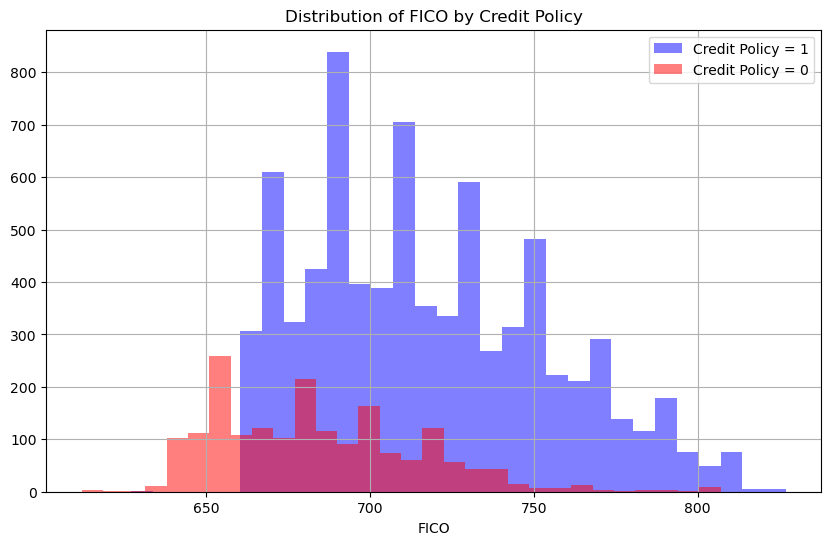

In [9]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome. 

plt.figure(figsize=(10, 6))

# Histogramme pour credit.policy = 1
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit Policy = 1')

# Histogramme pour credit.policy = 0
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit Policy = 0')

# Définir l'étiquette de l'axe des x
plt.xlabel('FICO')
# titre
plt.title('Distribution of FICO by Credit Policy')
# legende
plt.legend()
# affichage du graphique
plt.show()


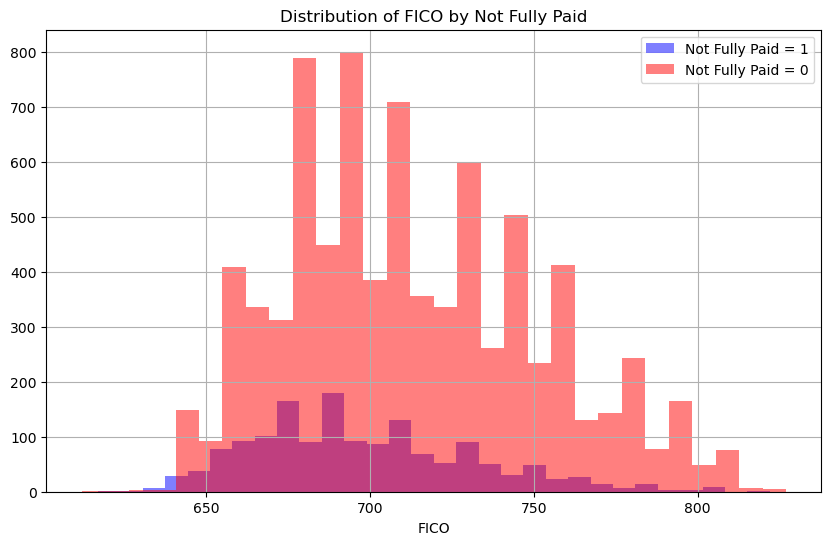

In [10]:
# Create a similar figure, except this time select by the not.fully.paid column.
plt.figure(figsize=(10, 6))

# Histogram for not.fully.paid = 1
df[df['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Not Fully Paid = 1')

# Histogram for not.fully.paid = 0
df[df['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Not Fully Paid = 0')

plt.xlabel('FICO')

# plot title
plt.title('Distribution of FICO by Not Fully Paid')

# legend
plt.legend()

# Show the plot
plt.show()


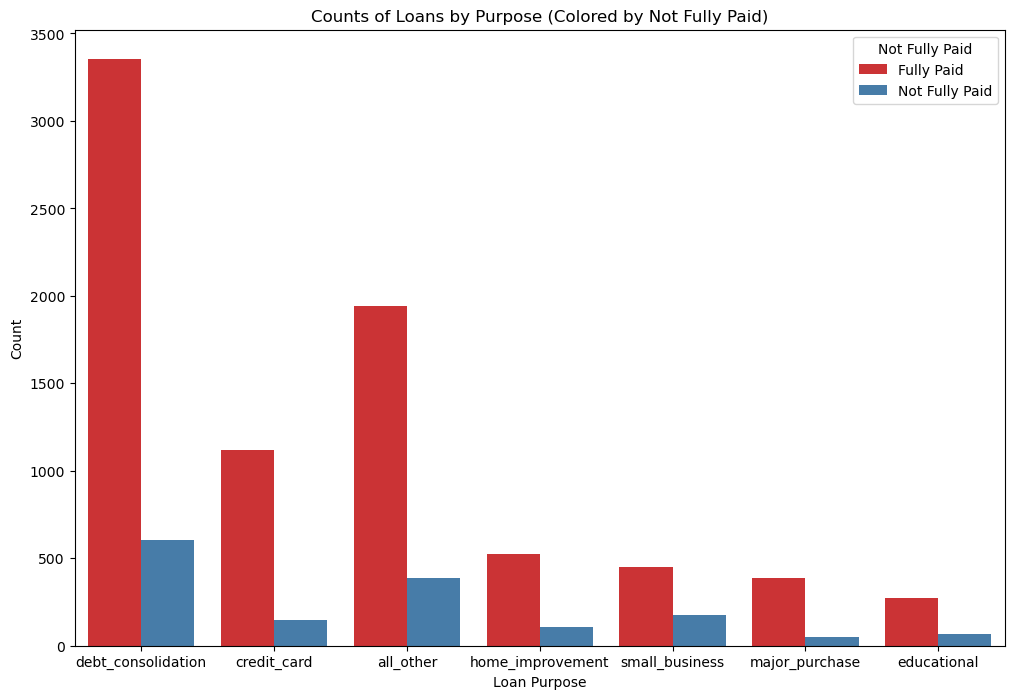

In [11]:
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

plt.figure(figsize=(12, 8))

# Use seaborn's countplot
sns.countplot(x='purpose', data=df, hue='not.fully.paid', palette='Set1')

plt.xlabel('Loan Purpose')

plt.ylabel('Count')

#title
plt.title('Counts of Loans by Purpose (Colored by Not Fully Paid)')

#legend
plt.legend(title='Not Fully Paid', labels=['Fully Paid', 'Not Fully Paid'])

# Show the plot
plt.show()


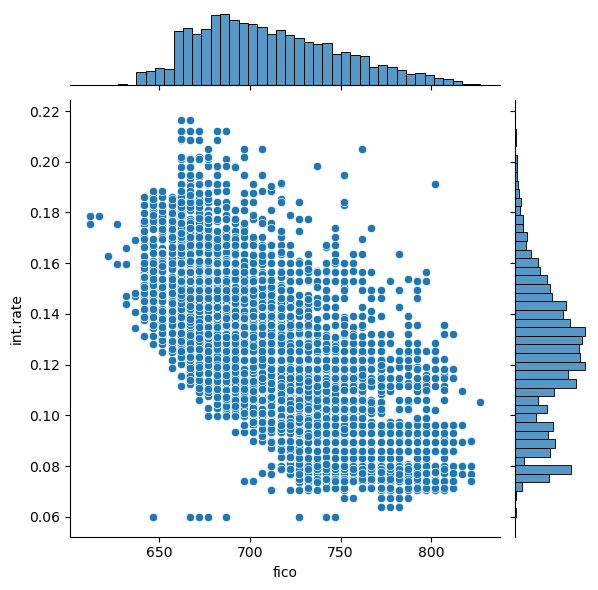

In [12]:
# Let's see the trend between FICO score and interest rate. Use the jointplot function.
sns.jointplot(x = 'fico', y = 'int.rate', data = df)


C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


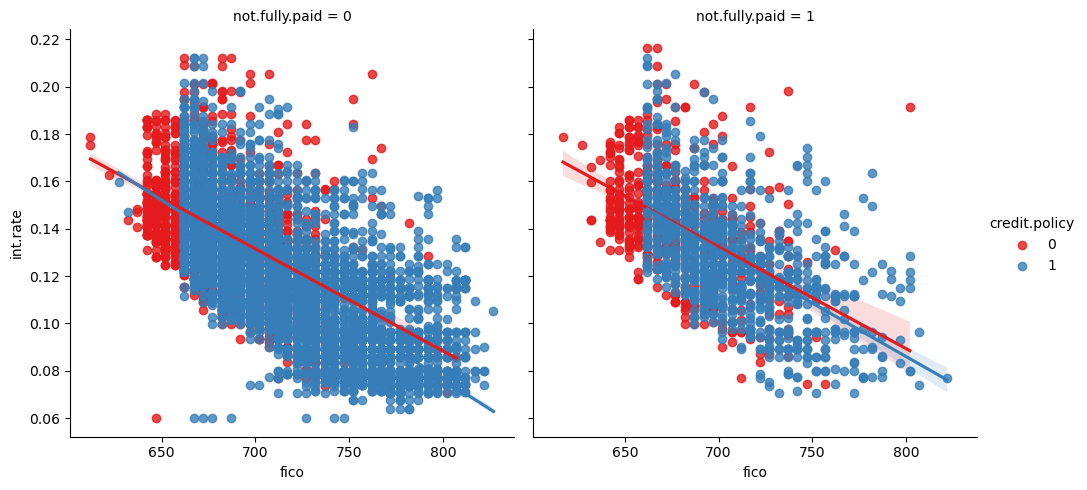

In [13]:
# Create lmplots to see if the trend differed between not.fully.paid and credit.policy.
# Check the documentation for lmplot() if you can't figure out how to separate it into columns.
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = df,markers=['o', 'o'], palette='Set1')


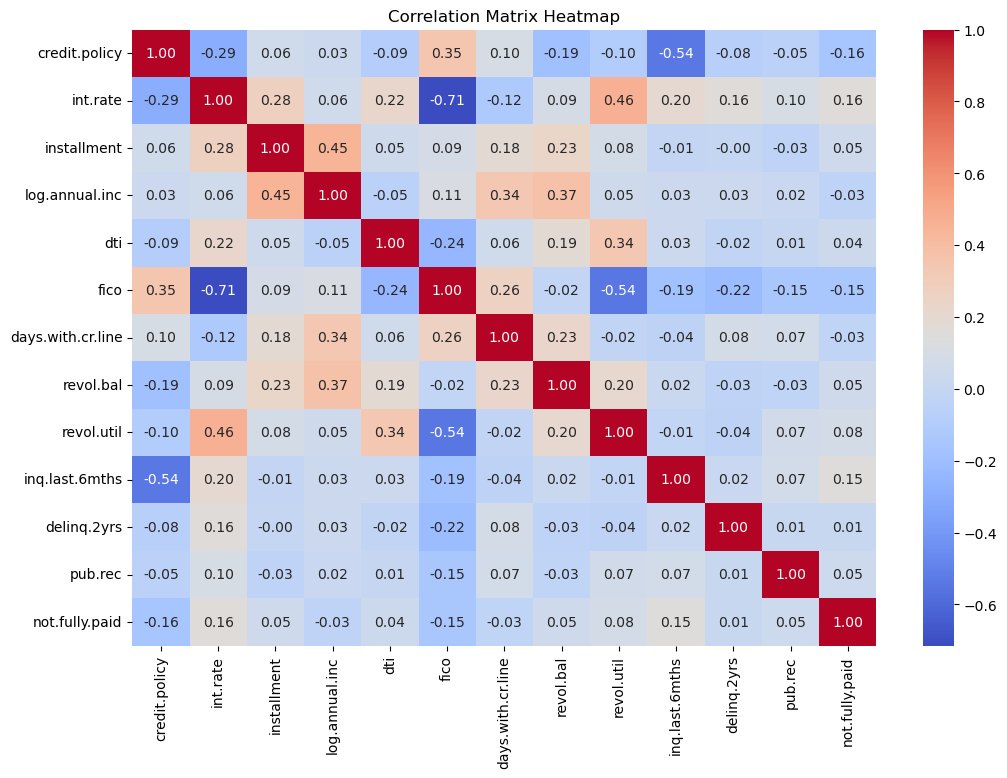

In [14]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#La carte de chaleur de la matrice de corrélation montre les liens entre les variables numériques par des couleurs.
#Des valeurs proches de 1 ou -1 indiquent une forte corrélation, près de 0 indique une faible corrélation.


## Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

In [15]:
# Check the information of the dataset with info() again.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [16]:
# Create a list of 1 element containing the string 'purpose'.
cat_feats = ['purpose']

In [17]:
# Now use get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables.
# Set this dataframe as final_data.
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## Train Test Split

Now its time to split our data into a training set and a testing set!

In [18]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [19]:
#it's a classification problem
# Import the appropriate version of DecisionTree, then
# train it with your training data.
from sklearn.tree import DecisionTreeClassifier

my_classifier = DecisionTreeClassifier(random_state=42)

my_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Predictions and Evaluation of Decision Tree


In [20]:

train_acc = my_classifier.score(X_train, y_train)
test_acc = my_classifier.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))

#We observe overfitting as the model achieves perfect accuracy on the training set (1.000), indicating memorization of the data.
#However, the lower test set accuracy (0.728) reveals a lack of generalization to new, unseen data.
#The model excels in predicting the known data but struggles to perform well on unfamiliar instances

Train accuracy: 1.000
Test accuracy: 0.728


In [21]:
# Create predictions from the test set and create a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
test_predictions = my_classifier.predict(X_test)

# Classification Report
print("The classification Report is:\n", classification_report(y_test, test_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("The confusion Matrix is:\n", conf_matrix)

The classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.18      0.21      0.19       305

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.73      1916

The confusion Matrix is:
 [[1332  279]
 [ 242   63]]


In [22]:

import itertools

# Initialize variables to store the best parameters and accuracy
best_test_acc = 0
best_params = {}

# Define the range of hyperparameter values
range_max_depth = range(3, 21)
range_min_samples_split = range(5, 55, 5)
range_max_features = range(2, X_train.shape[1])

# Iterate over all combinations of hyperparameters
for depth, samples, features in itertools.product(range_max_depth, range_min_samples_split, range_max_features):
    # Create a Decision Tree Classifier with the current hyperparameters
    tree = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=samples,
        max_features=features,
        random_state=42  # set a random state for reproducibility
    )
    
    # Train the model
    tree.fit(X_train, y_train)
    
    # Evaluate the accuracy on the test set
    accuracy = tree.score(X_test, y_test)
    
    # Update the best parameters if the current model has higher accuracy
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["max_depth"] = depth
        best_params["min_samples_split"] = samples
        best_params["max_features"] = features

# Print the best hyperparameters and the corresponding test accuracy
print("Best test accuracy: {:.3f}".format(best_test_acc))
print("  - max_depth = ", best_params["max_depth"])
print("  - min_samples_split = ", best_params["min_samples_split"])
print("  - max_features = ", best_params["max_features"])


Best test accuracy: 0.842
  - max_depth =  5
  - min_samples_split =  5
  - max_features =  6


In [23]:

feature_importances = tree.feature_importances_

# Create a DataFrame to map feature names and their importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top three most important features
top_features = sorted_importance_df.head(3)
print("The three most important features are:")
print(top_features)

The three most important features are:
             Feature  Importance
7          revol.bal    0.114512
6  days.with.cr.line    0.114319
4                dti    0.113241


## Training the Random Forest model

Now its time to train our model!


In [24]:
# Import the appropriate version of RandomForest, then
# train it with your training data.
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)


RandomForestClassifier()

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [25]:
# Predict the class of not.fully.paid for the X_test data
y_predict = forest.predict(X_test)

In [26]:
#It appears that the Random Forest model is overfitting the training data. 

# Accuracy on the training set
train_acc_forest = forest.score(X_train, y_train)

# Accuracy on the test set
test_acc_forest = forest.score(X_test, y_test)

print("Random Forest - Train accuracy: {:.3f}".format(train_acc_forest))
print("Random Forest - Test accuracy: {:.3f}".format(test_acc_forest))


Random Forest - Train accuracy: 1.000
Random Forest - Test accuracy: 0.838


In [27]:
# Predictions
y_pred_forest = forest.predict(X_test)

# Classification Report
classification_rep = classification_report(y_test, y_pred_forest)
print("Random Forest Classification Report:\n", classification_rep)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.38      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.61      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916



In [28]:
print(confusion_matrix(y_test,y_predict))
# the Random Forest performed better than the decision tree

[[1598   13]
 [ 297    8]]


In [30]:
# Level 2
# Train other random forest model with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree?

# Initialize variables to store the best parameters and accuracy
best_test_acc_forest = 0
best_params_forest = {}

# Define the range of hyperparameter values
range_n_estimators = [50, 100, 150, 200]
range_max_features = [2, 5, 8, 10, None]

# Iterate over all combinations of hyperparameters
for n_estimators, max_features in itertools.product(range_n_estimators, range_max_features):
    # Create a Random Forest Classifier with the current hyperparameters
    forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        random_state=42  # set a random state for reproducibility
    )
    
    # Train the model
    forest.fit(X_train, y_train)
    
    # Evaluate the accuracy on the test set
    accuracy_forest = forest.score(X_test, y_test)
    
    # Update the best parameters if the current model has higher accuracy
    if accuracy_forest > best_test_acc_forest:
        best_test_acc_forest = accuracy_forest
        best_params_forest["n_estimators"] = n_estimators
        best_params_forest["max_features"] = max_features

# Print the best hyperparameters and the corresponding test accuracy
print("Best Random Forest test accuracy: {:.3f}".format(best_test_acc_forest))
print("  - n_estimators = ", best_params_forest["n_estimators"])
print("  - max_features = ", best_params_forest["max_features"])


Best Random Forest test accuracy: 0.842
  - n_estimators =  100
  - max_features =  5
